### INE 410146 - Applied Machine Learning
$\textbf{Author: Prof. Mateus Grellert}$

Bibliography used in this lesson:
- Aggarwal, Charu C. Data mining: the textbook. Springer, 2015 - Chapter 10.7
- Aggarwal, Charu C. Neural networks and deep learning, 2018 - Chapter 1
- Luger, George F. Artificial intelligence: structures and strategies for complex problem solving. Pearson education, 2005 - Chapter 11

# 8 - Neural Networks

Neural Networks (NN) are special types of models that try to mimic the way our brain operates. Our brain is very efficient computing mechanism that operates using a network of several nerve cells called neurons. Each neuron has a very simple mechanism that receives electrical/chemical stimuli and eventually fires signals to other neurons through connections called synapses. These connections can either be excitatory (meaning synapses promote the generation of an electrical signal) or inhibitory (synapses prevent the generation of electrical signals). Our learning process consists in changing the strength in these synactic connections. 


NN follow the same idea of creating a connected network of simple units that resemble our biological neurons. For this reason, the terms ***connectionist*** and ***bio-inspired*** learning are commonly used when referring to NNs. It is also because of this analogy that some authors use the term **Artificial Neural Networks (ANN)** to represent the mathematical model. The figure below shows a comparison between a Biological and an Artificial Neural Network.

<center>
<img src ="FIGS/8-biological_artificial_neuron.png" width="600px"><br>(source: Aggarwal, Charu C. "Neural networks and deep learning." (2018))
</center>
    
On the right side of this figure, we have the input channels of the neurons (called dendrites), receiving stimuli from other units. These stimuli are weighted ($w_1$, $w_2$, ...) before being passed to the core of the neuron, which represents the strength in synaptic connexions. The inputs can come from other neurons (thus the term network), or from external data (which would be analogous to our biological sensors).

In the next sessions, we will discuss how these models can be automatically trained to learn the correct weights of each input.

## The Perceptron

The Perceptron was one of the first mathematical model of a neuron and is the basis of modern NNs to this day. This model was proposed in 1958 by a psychologist named Frank Rosenblatt, while he was working as a researcher at the Cornell Aeronautical Laboratory. The figure below shows an illustration of the Perceptron.

<center>
<img src="https://miro.medium.com/max/1400/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="500px">
<br> (source: Medium)
</center>

The Perceptron consists of four parts (mapped in the figure):
- A set of input values that are represented as an **input layer** (blue circles)
- **Weights** associated to each input value (green circles)  and a **bias** term (constant*$w_0$)
- An accumulating unit that adds up the weighted inputs (first red circle)
- An **activation** (or threshold) function that translates the accumulated value to an output (second red circle). The threshold function is intended to produce the on/off state of actual neurons.

The weights are multiplied with each input before being fed to the accumulator. This also means that the first component of a Perceptron is a **Multiply-and-Accumulate (MAC)** operation.

In general terms, the magnitude of the weigths affect how steep the curve (or step in this case) of the activation is. The bias adjusts how where the threshold between negative and positive outputs occurs. The animation below shows an illustration of this concept.


<center> <br>
<img src="FIGS/8-create_step_function.gif" width=400px /> <br> (source: neuralnetworksanddeeplearning.com)
</center>

The activation function of a Perceptron varies depending on the reference, but it is either a unitary step (or heaviside) function or a sign function, both of which map an input value to two possible outputs. We will use the former in this lesson, but the equations for both can be seen below, where $H$ is the heavised function.

<div style="display: flex;margin:10px">
<div style="margin-right: 50px">
$sign(x) =   \left\{
    \begin{array}{l}
      -1, ~\mathrm{if } x \leq 0\\
      +1 ~\mathrm{ otherwise}
    \end{array}
  \right.
$
</div>
<div>
$H(x) =   \left\{
    \begin{array}{l}
      0, ~\mathrm{if } x \leq 0\\
      1 ~\mathrm{ otherwise}
    \end{array}
  \right.
$
</div>
</div>

As we can observe, the Perceptron was originally designed to model **binary classification** problems, as it mimics the on-off effect of neural synapses. However, Perceptrons can also be used for regression by removing the activation function, using the MAC result as output. 

Putting it all together, considering a data set $D$ containing $N$ input samples with that we will call $X$, each containing $k$ features, and a label vector $y$, we can define the mathematical model of the perceptron as folows:

$ z_i = H\big(\sum\limits_{j=1}^k({w_j*x_{i,j})+b}\big)$, or similarly in matrix notation, <br>
$ z_i = H(\bar{W}\bar{X_i}+b)$

Where $z_i$ is the output for the $X_i$ input sample. Note that the first term represents the MAC operation, which as added with the bias value. As the second. equation shows, we can also represent this MAC operation using the **dot product** of the $\bar{W}$ and $\bar{X_i}$ arrays. A final observation is that the Perceptron, like the Linear/Logistic regressions, is a **linear model**, meaning it will define a line, a plane or a hyperplane to separate our data set. 

Now let's remember the fact that we want to learn a given task with this model, so we need to somehow adjust it to fit our input samples into expected output values. The quality of this fit is measured with a **loss function** that computes how wrong our predictions are. Therefore, we must minimize this loss function to obtain a good model. The loss function used in the Perceptron algorithm is called **0-1 loss**, and is defined as follows:

$L_{0-1}(y,\hat{y}) = \sum\limits_{i=1}^N|y_i-\hat{y}_i|$

We can interpret the $L_{0-1}$ loss as simply being the total amount of wrong predictions.

Now that we have a model for our neuron and a loss function to evaluate it, we can adjust the $\bar{W}$ and $b$ terms of our model to minimize this loss. The question is: ***how can we do that without testing every possible combination?***

The Perceptron **learning algorithm**, has a clever weight update rule that updates the weights based on an implicit smooth approximation of the gradient of the **$L_2$-loss function**. In other words, it employs a type of gradient descent. Let's check the formula:

$W' = W+\alpha(y-\hat{y})*X$

When the values between $y$ and $\hat{y}$ are the same (correct predictions), the difference becomes $0$ and no update is applied. When they are different, the weights go up or down to follow the gradient of the $L_2$-loss. 

This update occurs for each input sample in our data set, and each complete pass is called an **epoch**. The training is repeated until convergence (loss becomes zero), or when the maximum number of epochs is achieved.

The $\alpha$ term is called the **learning rate**. It controls how agressively the weights will be updated when mispredictions occur. Just like with gradient descent, high values of $\alpha$ will lead to faster convergence, but can also cause divergence. Small values of $\alpha$ take longer to converge.


Now we will see all of these concepts in code. First, let's set up an example data set with the help of the ``make_classification()`` function. An important note here is that Perceptrons and NNs in general require data to be **normalized** so that each input feature falls within the same range. Since this is already guaranteed with the ``make_classification()`` function, we can simply disregard this.


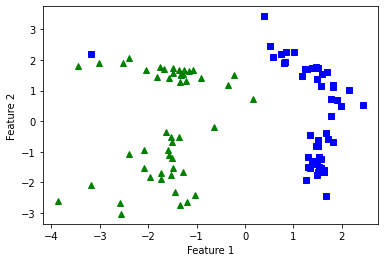

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_classification(n_samples=100, class_sep = 1.5,
                                    n_features=2, n_informative=2, 
                                    n_redundant=0, n_classes=2)

plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Now we will implement the followinc necessary functions:
 - $L_{0-1}$ loss: implements the 0-1 loss function
 - Step function (heaviside): activation function of our neuron
 - **prediction**: receives the input samples and the network parameters (weights) to compute the predicted output.
 - **perceptron train**: implements the training algorithm using the weight update rule previously discussed
 - **plot decision boundary**: a helper function that implements the visualization of the decision function

In [2]:
# code adapted from: 
# https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537

import numpy as np

# computes the 0-1 loss for given an array of real (y) and predicted (y_hat) values
def zero_one_loss(y, y_hat):
    return (y.astype(int) != y_hat.astype(int)).sum()

# heaviside step function implementation (using matrix operations)
def step_func(z):
        return (z > 0).astype(int)
    
# predicting consists of applying the MAC + activation function over the input samples
def predict(X, weights):
    # creating one column for the bias term
    bias = np.ones(X.shape[0])
    X_bias = np.hstack((bias.reshape(-1,1), X))
    y_hat = []
    for x_i,y_i in zip(X_bias,y):            
        # Calculating prediction/hypothesis.
        y_hat_i = step_func(np.dot(x_i.T, weights))
        y_hat.append(y_hat_i)

    return np.array(y_hat).ravel()

def perceptron_train(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(weights) to zeros.
    # +1 in n+1 for the bias term.
    weights = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(1,epochs+1):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, weights))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                weights += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        if epoch % 10 == 0:
            y_hat = predict(X, weights)
            loss = zero_one_loss(y, y_hat)
            print(f'Epoch {epoch}, 0-1 loss {loss}')
            
        # early termination when loss reaches 0
        if n_miss == 0:
            break

    return weights

def plot_decision_boundary(X, weights):
    
    # X --> Inputs
    # weights --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = weights0.X0 + weights1.X1 + weights2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -weights[1]/(weights[2]+0.00001)
    c = -weights[0]/(weights[2]+0.00001)
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(6,4))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Perceptron Algorithm")
    yrange = abs(X[:, 1].max() - X[:, 1].min())
    ymin = np.round(X[:, 1].min() - yrange/5,1)
    ymax = np.round(X[:, 1].max() + yrange/5,1)

    plt.ylim((ymin, ymax))
    plt.tight_layout()
    plt.plot(x1, x2, 'y-')

Now we are ready to run our Perceptron using the code above. Feel free to try different values of $\alpha$ and number of epochs.

Epoch 10, 0-1 loss 2
Epoch 20, 0-1 loss 2
Epoch 30, 0-1 loss 3
Epoch 40, 0-1 loss 4
Epoch 50, 0-1 loss 2
Final loss: 2


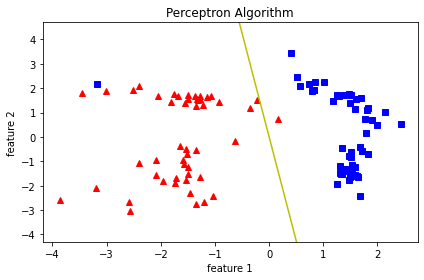

In [3]:
lr = 1
epochs = 50 

weights = perceptron_train(X, y, lr, epochs)
y_hat = predict(X, weights)
loss = zero_one_loss(y, y_hat)
print(f'Final loss: {loss}')
plot_decision_boundary(X, weights)


If our data is **linearly separable**, we can fit a perfect line that separates both groups using the Perceptron algorithm. However, in most cases our data is not linearly separable, so a linear model like the Perceptron will not be able to fit a model that completely separates the two groups. That is why we introduce the number of epochs as a stopping criterion as well, since convergence cannot be completely obtained.

Althought the Perceptron is quite efficient for linear data, it fails miserably when our decision boundary must be nonlinear. A classical problem that is nonlinear and is commonly used to prove this concept is the **XOR problem**. It consists of a very simple function that maps two binary inputs to an exclusive-or (XOR) function output. 

If we plot the XOR function as a scatter plot, we will notice that we really cannot separate the negative and positive examples with a single line. Let's check it out in code and see how our Perceptron performs.

Epoch 10, 0-1 loss 2
Epoch 20, 0-1 loss 2
Epoch 30, 0-1 loss 2
Epoch 40, 0-1 loss 2
Epoch 50, 0-1 loss 2
Final loss: 2


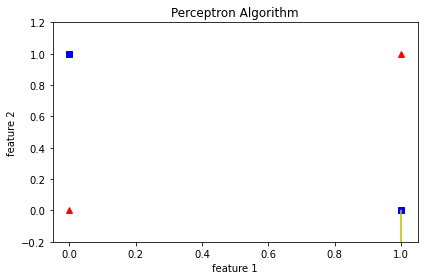

In [4]:
X = np.array([
    0, 0,
    0, 1,
    1, 0,
    1, 1
]).reshape(4, 2)

y = np.array([0, 1, 1, 0]).reshape(4,)

lr = 1
epochs = 50 

weights = perceptron_train(X, y, lr, epochs)
y_hat = predict(X, weights)
loss = zero_one_loss(y, y_hat)

print(f'Final loss: {loss}')
plot_decision_boundary(X, weights)


## Multilayer Perceptrons (MLP)

What about nonlinear models? As we mentioned, our data is usually not linearly separable, so linear models like the Perceptron are not very efficient.

To solve this, the Multilayer Perceptrons (MLP) were created. As the name suggests, we use several Perceptrons instead of one to creat MLPs. Therefore, we have at least three layers in a MLP: (i) an input layer; (ii) a hidden layer containing 2 or more perceptrons; and (iii) an output layer. Is it also possible to use more than one hidden layer. In this casse the outputs from the previous layer are used as inputs to the next one, configuring a **feed-forward network**. The figure below shows an example of a MLP with a single hidden layer.

<center>
<img src="https://www.researchgate.net/profile/Mohamed-Zahran-16/publication/303875065/figure/fig4/AS:371118507610123@1465492955561/A-hypothetical-example-of-Multilayer-Perceptron-Network.png" width="500px">
<br> (source: Mohamed, H., et al. "Assessment of artificial neural network for bathymetry estimation using High Resolution Satellite imagery in Shallow Lakes: case study El Burullus Lake." International water technology conference. 2015)
</center>

The main idea is that the different nodes in the hidden layer can capture different decision boundaries in different regions of the data, and the node in the output layer can combine the results from these different decision boundaries.
 
A second important observation that differs MLP from single Perceptrons is that the **activation functions used in each node of the MLP cannot be linear**. This is a necessary constraint that allows us to train these networks more efficiently.

Traditionally, two types of activations are used, both of which are sigmoid functions: the hiperbolic tangent ($\mathrm{tanh}$) and the logistic function. They are both sigmoid functions, meaning they map the input to an S-shaped curve, but $\mathrm{tanh}$ maps the values to $-1$ and $1$, whereas the logistic maps values to a $0,1$ interval. The figures below show the equation and the plot of each function.

<table>
    <tr> 
    <th>  logistic </th>   <th>  tanh </th> 
    </tr>
    <tr>
    <td> $L(x) = \frac{1}{1+e^{-cx}}$  </td> <td>  $tanh(x) = \frac{senh(x)}{cosh(x)} = \frac{e^x-e^{-x}}{e^x+e^{-x}}$  </td> 
    </tr>
    <tr>
    <td> <img src="FIGS/8-logistic.png" width=300px /> </td> <td> <img src="FIGS/8-tanh.png" width=300px /> 
    </tr>
</table>

While both can be used to solve the same problems and are likely to produce similar results with enough training time and effort, some practioners recommend using tanh over sigmoid (like [here](https://medium.com/analytics-vidhya/activation-functions-why-tanh-outperforms-logistic-sigmoid-3f26469ac0d1)) due to the fact that tanh treats differently strongly negative inputs (mapping them near $-1$) and irrelevant ones (mapping to $0$). 

Aggarwal mentions two important challenges that arise from using MLPs:

- The initial design of the topology of the network presents many **trade-off challenges** for the analyst. A larger number of nodes and hidden layers provides greater generality, but a corresponding risk of overfitting. Little guidance is available about the design of the topology of the neural network because of poor interpretability associated with the multilayer neural network classification process. While some hill climbing methods can be used to provide a limited level of learning of the correct neural network topology,the issue of good neural network design still remains somewhat of an open question.
- Neural networks are **slow to train** and sometimes sensitive to noise. Thousands of epochs may be required to train a multilayer neural network. A larger network is likely to have a very slow learning process. While the training process of a neural network is slow, it is relatively efficient to classify test instances.

Another problem that arises with the use of MLPs is the fact that we cannot employ the Perceptron update rule, because it doesn't give us a way of updating the weights of the intermediate hidden layers. That was solved with the backpropagation algorithm shown in the next section.


## Backpropagation Algorithm

When we were training the Perceptron, it was easy to understand how to update the weights because we had a direct mapping between them and the output. In the case of multilayer networks, the problem is that the ground-truth output of the hidden layer nodes are not known because there are no training labels associated with the outputs of these nodes. 

Therefore, we need to find a way to make errors on the output layer affect the weights of all the internal nodes of our network. This is achieved with the use of the **backpropagation algorithm**. This algorithm contains two main phases, which are applied in the weight update process for each training instance:

- **Forward pass:** the inputs are fed into the network and the output of each node is propagated all the way to the output nodes. In this pass, there is no weight update. We are simply concerned with obtaining the output of the network to check whether or not the predicted label is an error.

- **Backward pass:** here the goal is to update the weights in the backward direction by providing an error estimate of the output of a node in the earlier layers, using the errors in later layers. The error estimate of a node in the hidden layer is computed as a function of the error estimates and weights of the nodes in the layer ahead of it. This is then used to compute an **error gradient** with respect to the weights in the node and to update the weights of this node. The **learning rate** is also applied in this step to adjust the strength of each update.

The actual update equation is not very different from the basic perceptron at a conceptual level. The only differences that arise are due to the nonlinear functions commonly used in hidden layer nodes, and the fact that errors at hidden-layer nodes are estimated via backpropagation, rather than directly computed by comparison of the output to atraining label. This entire process is propagated backwards to update the weights of all the nodes in the network. The animation below shows an overview of how backpropagation occurs.

<center> <br>
<img src="https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif" width=400px /> <br> (source: machinelearningknowledge.ai)
</center>

The catch to propagate the error gradient along the hidden layers of the network is based in the **chain rule** of calculus. The chain rule allows us to find the derivative of composite functions, and the clever trick of the backpropagation algorithm was to model the hidden layers as such composite functions.

One very important aspect of backpropagation is that it **requires activation functions that are differentiable**. That is because the gradient of the error with respect to the weights can only be computed using the derivative of the activation function. If we use, for instance, a step function as activation, the derivative is always zero, which will cancel out our updates. 

## Batch, Stochastic and Mini-batch Gradient Descent

As we've seen, the backpropagation algorithm gives us a mathematical way of updating the weights of our Neural Network using Gradient Descent and the chain rule as foundations. However, this process can still be quite computing and data intensive, as it involves a googolplex of multiplications and additions in its forward and backward passes. 

If we update the weights with each input sample, we allow our model to adapt to every type of input we have. At the same time, this requires a significant amount of backward passes, specially if we have huge data sets.

There are several strategies that allows us to reduce explore the trade-off between training efficiency and complexity. Let's see how they work:

- **Batch Gradient Descent**: in this strategy, all the samples are used in the forward pass, and the backward pass is only computed after this, using the average of the gradients to update the weights. Therefore, we have only one weight update in an epoch. The advantage is that we have a significant reduction in computing time, but we are losing a lot of information with the error aggregation.
- **Stochastic Gradient Descent (SGD)**: a second approach consists of computing the forward and backward passes for each input sample. Therefore, our model will update faster and also converge faster.
- **Mini-batch Stochastic Gradient Descent**: this is a mid-term between the two. The idea is that we aggrate the gradient over a small subset of input samples (called batches). After each batch, we update our model weights with a backward pass.

The table below compares each strategy in terms of number of forware and backward passes computed each epoch for a data set with $N$ samples. The term $B$ represents the batch size.

|                |BGD    |SGD    |MB-SGD   |
|---|---|---|---|
|forward passes  | $N$   | $N$   | $N$     |
|backward passes | $1$   | $N$   | $N/B$   |

## MLP in Code

The code below implements:
 - a classification MLP
 - trained to optimize the L2-norm using SGD
 - uses logistic as activation function in all its nodes
 
This code is an adaptation of a very good [post]( https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/) from the Machine Learning Mastery blog. The only difference is that this version supports multiple layers with arbitrary sizes each.

Feel free to study the code and tinker with the MLP parameters. It would also be interesting to try it with a real data set (don't forget to normalize your data though).

In [5]:
# code adapted from: 
# https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

# Backprop on the Seeds Dataset
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp

# Calculate neuron MAC for an input
def mult_accum(weights, inputs):
    mac = weights[-1]
    for i in range(len(weights)-1):
        mac += weights[i] * inputs[i]
    return mac

# sigmoid (logistic) activation
def logistic(mac):
    return 1.0 / (1.0 + exp(-mac))

# Calculate the derivative of the logistic output (for gradient computation)
def logistic_derivative(output):
    return output * (1.0 - output)

# Computes the accuracy of a data set given a trained network
def compute_acc(X, y, network):
    acc = 0.0
    for xi, yi in zip(X,y):
        prediction = predict(network, xi)
        acc += int(yi == prediction)
    return acc/X.shape[0]

# Forward propagate a single input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            mac = mult_accum(neuron['weights'], inputs)
            neuron['output'] = logistic(mac)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    # for each layer
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            # hidden layers - error = W*delta(z)
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            # last layer - gradient = output - expected (for L2-loss)
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(neuron['output'] - expected[j])
        
        # computes the gradient (delta) of the error
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * logistic_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] -= l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, X, y, l_rate, n_epoch, n_classes):
    for epoch in range(1, n_epoch+1):
        for row, label in zip(X, y):
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_classes)]
            expected[int(label)] = 1
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
            
        if (epoch % 10) == 0:
            acc = compute_acc(X, y, network)
            print(f'Epoch {epoch} - Accuracy {acc}')
            
# Initialize a network
def initialize_network(n_inputs, n_hidden_list, n_classes):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden_list[0])]
    network.append(hidden_layer)
    for i in range(1, len(n_hidden_list)):
        hidden_layer = [{'weights':[random() for j in range(n_hidden_list[i-1] + 1)]} for j in range(n_hidden_list[i])]
        network.append(hidden_layer)

    output_layer = [{'weights':[random() for i in range(n_hidden_list[-1] + 1)]} for i in range(n_classes)]
    network.append(output_layer)
    return network

# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(X , y, l_rate, n_epoch, n_hidden):
    n_inputs = X.shape[1]
    n_classes = len(np.unique(y))
    
    network = initialize_network(n_inputs, n_hidden, n_classes)
    train_network(network, X, y, l_rate, n_epoch, n_classes)
    return network


X, y = datasets.make_classification(n_samples=2000, class_sep = 0.5,
                                    n_features=8, n_informative=4, 
                                    n_redundant=0, n_classes=2)

# evaluate algorithm
l_rate = 1
n_epoch = 100
n_hidden = [10,5]
network = back_propagation(X , y, l_rate, n_epoch, n_hidden)


Epoch 10 - Accuracy 0.855
Epoch 20 - Accuracy 0.9
Epoch 30 - Accuracy 0.9075
Epoch 40 - Accuracy 0.907
Epoch 50 - Accuracy 0.904
Epoch 60 - Accuracy 0.918
Epoch 70 - Accuracy 0.9125
Epoch 80 - Accuracy 0.9185
Epoch 90 - Accuracy 0.9195
Epoch 100 - Accuracy 0.9105


We can see that the MLP is increasing its performance over time thanks to the backpropagation algorithm. We could obtain better results by increasing the number of epochs, for instance, or with a different network topology.

An important aspect that is not supported in this code is that it doesn't allow us to load pre-trained weights in the ``back_propagation()`` method. This is standard procedure when training NNs due to the time it takes to train it. We could for instance, train for 100 epochs, evaluate and store its weights, and then train it again for 100 more epochs to obtain better results.

Finally, this extensive code was only shown here for learning purposes, as the ``scikit-learn`` package already gives us an off-the-shelf MLP implementation. Let's check it out. 

In [6]:
from sklearn.neural_network import MLPClassifier

X, y = datasets.make_classification(n_samples=2000, class_sep = 0.5,
                                    n_features=8, n_informative=4, 
                                    n_redundant=0, n_classes=2)

clf = MLPClassifier(hidden_layer_sizes = (10, 5), 
                    activation = 'logistic', solver = 'sgd',
                    batch_size = X.shape[0],
                    learning_rate_init = 1.0, 
                    max_iter = 100,
                    verbose = False)
clf.fit(X,y)
pred = clf.predict(X)
accuracy = (y == pred).mean()
print('Accuracy: ', accuracy)

Accuracy:  0.7325


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## Summary
- Neural Networks are connectionist models that were inspired by our neurons
- The first widely adopted mathematical model of a neuron was the Rosenblatt's Perceptron, and it is used to this day in many NN topologies. It is a linear model that uses a threshold-based activation.
- Multilayer Perceptrons are formed by connecting several layers of perceptrons in a feed-forward architecture. However, they are not strictly Perceptrons because their activation functions are nonlinear.

In our next lesson, we will continue discussing some basic learning techniques to make our models even more efficient. 

<h1> <center> See you all in our next lesson! &#128516; </center> </h1>